Here is simple example of using handcrafted agents in MINOS simulator

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import argparse
import gym
import gym_minos
import matplotlib.pyplot as plt
import torch
from minos.config.sim_args import parse_sim_args
import sys
import os
sys.path.insert(0, '../')
from navigation.ClassicAgents import LoggingAgent,BlindAgent, ClassicAgentWithDepth, defaultAgentOptions


/home/old-ufo/storage/anaconda3/envs/NavigationPytorchMinosE/lib/python3.7/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
2019-01-25 01:14:13,261 INFO {'sim_id': 'sim00', 'machine': 'oldufo-ubuntupc', 'sim_git_hash': 'f192737', 'stk_git_hash': 'f192737'}
2019-01-25 01:14:13,274 INFO sim00:Starting sim server at /home/old-ufo/minos/minos/server/server.js with port 53709


train:110 episodes
test:50 episodes
val:20 episodes


2019-01-25 01:14:15,323 INFO sim00:connect
2019-01-25 01:14:15,427 INFO sim00:inited


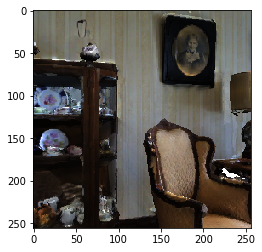

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
sys.argv = ['-f',  '--env_config', 'pointgoal_mp3d_m', '--episode-schedule', 'test']
parser = argparse.ArgumentParser()
parser.add_argument('--save_observations', action='store_true',
                    default=False,
                    help='Save sensor observations at each step to images')
parser.add_argument('--num-episodes-per-scene', type=int,
                    default=1,
                    help='Number of diffent random start and end locations')
parser.add_argument('--episode-schedule', type=str,
                    default='val',
                    help='Split to use. Possible are: train, val, test. Paper reports results on test')
    
args = parse_sim_args(parser)
args['observations']['depth'] = True
args['observations']['map'] = True

args['agent']['eyeHeight'] = 1.09
args['available_controls'] = ['turnLeft', 'turnRight', 'forwards', 'backwards', 'strafeLeft', 'strafeRight', 'lookDown', 'lookUp']
env = gym.make('indoor-v0')
env.configure(args)

observation = env.reset()
action = env.action_space.sample()
observation, reward, done, info = env.step(action)
plt.imshow(observation['observation']['sensors']['color']['data'])


Now agents

In [3]:
args['agent_type'] = 'ClassicRGBD'
opts = defaultAgentOptions(args)
opts['slam_vocab_path'] = '../data/ORBvoc.txt'
opts['slam_settings_path'] = '../data/mp3d3_small1k.yaml'
Agent = ClassicAgentWithDepth(**opts)

5.023439600607242
5.023439600583961
5.023439600572322
4.8505026701932366
4.679722949760429
4.595217323804808
4.5531999666428575
4.542783486031486
4.537584776093533
4.508591272215077


<Figure size 432x288 with 0 Axes>

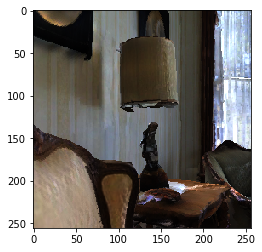

<Figure size 432x288 with 0 Axes>

In [11]:
for i in range(10):
    dg = observation['observation']['measurements']['distance_to_goal'][0]
    action, stop = Agent.act(observation)
    observation, reward, done, info = env.step(action)
    print (dg)
plt.imshow(observation['observation']['sensors']['color']['data'])
plt.figure()


tensor([[250., 213.]]) tensor([[206., 205.]], device='cuda:0')
tensor([[[ 0.4205, -0.0312,  0.9068,  0.4432],
         [ 0.0627,  0.9980,  0.0053,  0.0118],
         [-0.9051,  0.0546,  0.4216,  0.5229],
         [ 0.0000,  0.0000,  0.0000,  1.0000]]], device='cuda:0')


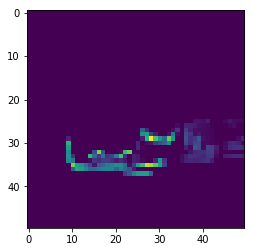

In [12]:
#Agent map
plt.imshow(Agent.map2DObstacles.detach().cpu().numpy().squeeze()[180:230,180:230])
print (Agent.estimatedGoalPos2D, Agent.getCurrentPositionOnMap())
print (Agent.pose6D)
